In [ ]:
#clusterys agrupamentos, algorítimos de clusterização não supervisionada
#k means usa distância euclidiana para agrupar os dados a partir de um número de clusters definido pelo usuário
#agrupar sem olhar a classe e comparar com a classe real

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
unicos, quantidade = np.unique(iris.target, return_counts=True)
unicos

array([0, 1, 2])

In [3]:
cluster = KMeans(n_clusters=3)
cluster.fit(iris.data)


KMeans(n_clusters=3)

In [4]:
centroides = cluster.cluster_centers_
centroides

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
previsto = cluster.labels_
previsto

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [6]:
#contagem de registros por cluster
unicos2, quantidade2 = np.unique(previsto, return_counts=True)
unicos2

array([0, 1, 2])

In [7]:
quantidade2

array([50, 62, 38], dtype=int64)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


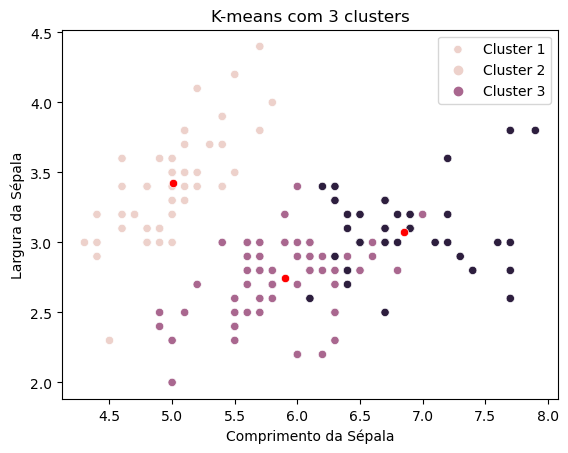

In [11]:
#plotar os gráficos dos clusters gerados e dos clusters reais do dataset iris para comparar usando seaborn
import seaborn as sns
sns.scatterplot(iris.data[:, 0], iris.data[:, 1], hue=previsto)
sns.scatterplot(centroides[:, 0], centroides[:, 1], color='r')
plt.title('K-means com 3 clusters') 
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()




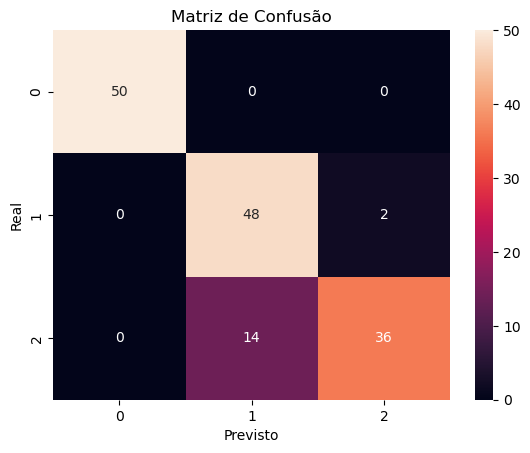

In [12]:
#plotar matriz de confusão com seaborn
matriz = confusion_matrix(iris.target, previsto)
sns.heatmap(matriz, annot=True)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

c:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


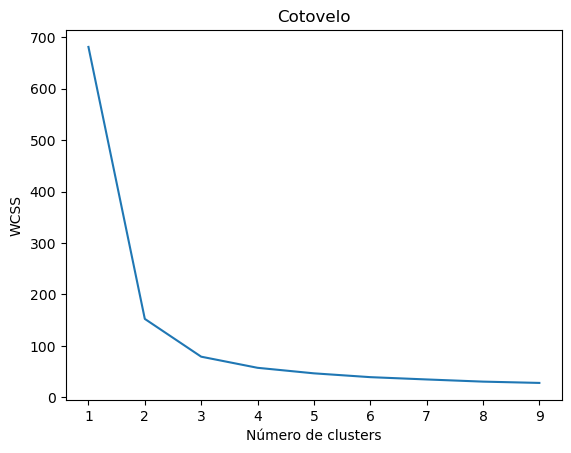

In [13]:
#plotar curva de cotovelo para definir o número de clusters
wcss = []
for i in range(1, 10):
    cluster = KMeans(n_clusters=i)
    cluster.fit(iris.data)
    wcss.append(cluster.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()